
# INSTRUÇÃO PRÁTICA - IP-P010 - ETAPA 2 - PLOTAGEM
## PP - PROGRAMAÇÃO EM PYTHON

### RESIDENTE: JOSE ULIAN CARDOSO ALMEIDA



In [1]:
import pandas as pd
from faker import Faker
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fake = Faker('pt_BR')  # Configuração para gerar dados em português do Brasil

In [3]:
# Gerar dados aleatórios
np.random.seed(50)

In [4]:
nomes = [fake.name() for _ in range(1000)]
sexos = np.random.choice(['M', 'F'], size=1000)
idades = np.random.randint(18, 29, size=1000)
emails = [fake.email() for _ in range(1000)]
notas_enem = np.random.randint(640, 801, size=1000)
cra_2_sem = np.random.uniform(5, 10, size=1000)
cra_4_sem = np.random.uniform(5, 10, size=1000)
cra_6_sem = np.random.uniform(5, 10, size=1000)
abandonos = np.random.choice([True, False], size=1000)
semestre_abandono = np.random.randint(1, 11, size=1000)

In [5]:
# Ajustar CRAs após o semestre de abandono
for i in range(1000):
    if abandonos[i]:
        if semestre_abandono[i] <= 2:
            cra_2_sem[i] = np.nan
        elif semestre_abandono[i] <= 4:
            cra_4_sem[i] = np.nan
        elif semestre_abandono[i] <= 6:
            cra_6_sem[i] = np.nan

In [6]:
# Criar DataFrame
data = {
    'Nome': nomes,
    'CPF': [fake.cpf() for _ in range(1000)],
    'Idade': idades,
    'Sexo': sexos,
    'Email': emails,
    'Nota_ENEM': notas_enem,
    'CRA_2º_Semestre': cra_2_sem,
    'CRA_4º_Semestre': cra_4_sem,
    'CRA_6º_Semestre': cra_6_sem,
    'Abandono': abandonos,
    'Semestre_Abandono': semestre_abandono
}

In [7]:
df = pd.DataFrame(data)

In [8]:
# Visualizar as primeiras linhas do DataFrame
df.head()
#df.to_csv('dados_alunos.csv', index=False)

,Nome,CPF,Idade,Sexo,Email,Nota_ENEM,CRA_2º_Semestre,CRA_4º_Semestre,CRA_6º_Semestre,Abandono,Semestre_Abandono
0,Melissa Silveira,359.847.162-91,22,M,bdas-neves@example.com,771,NaN,5.491834,5.495809,True,1
1,Sofia Mendes,360.852.471-17,20,M,stephanyfogaca@example.org,777,6.466784,5.570117,8.355556,False,7
2,Srta. Agatha Rezende,247.590.318-04,22,F,joao-lucas90@example.com,770,9.559240,7.459101,7.298546,False,9
3,Thales Nogueira,941.536.207-34,20,F,helenasilva@example.com,658,NaN,8.187005,7.770323,True,2
4,Sr. Emanuel Aragão,025.349.178-97,25,F,maria-eduardada-costa@example.net,787,9.227646,5.956309,8.626647,True,8


In [9]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [10]:
#df.to_csv('dados_alunos.csv', index=False)

In [11]:
contagem_sexo = df['Sexo'].value_counts()

In [12]:
print('A divisão por gênero é:', contagem_sexo)

A divisão por gênero é: Sexo
F    523
M    477
Name: count, dtype: int64


### 1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.
### Será observador o percentual de cada gênero.

In [13]:
contagem_masculino = sum(1 for sexo in df['Sexo'] if sexo == 'M')

In [14]:
contagem_feminino = sum(1 for sexo in df['Sexo'] if sexo == 'F')

In [15]:
print('Percentual por gênero')
print('Masculino: ', contagem_masculino / 10, '%')
print('Feminino: ', contagem_feminino / 10, '%')

Percentual por gênero
Masculino:  47.7 %
Feminino:  52.3 %


In [16]:
df.columns

Index(['Nome', 'CPF', 'Idade', 'Sexo', 'Email', 'Nota_ENEM', 'CRA_2º_Semestre',
       'CRA_4º_Semestre', 'CRA_6º_Semestre', 'Abandono', 'Semestre_Abandono'],
      dtype='object')

In [17]:
def plot_pizza_divisao_por_sexo(df):
    contagem_masculino = (df['Sexo'] == 'M').sum()
    contagem_feminino = (df['Sexo'] == 'F').sum()
    num_linhas = len(df)
    percentual_masculino = contagem_masculino / num_linhas * 100
    percentual_feminino = contagem_feminino / num_linhas * 100
    
    #Repassando apenas a coluna de plotagem.
    df_percentual_sexo = pd.DataFrame({
        'Sexo': ['Masculino', 'Feminino'],
        'Percentual': [percentual_masculino, percentual_feminino]
    })

    plt.figure(figsize=(3, 2))
    plt.pie(df_percentual_sexo['Percentual'], labels=df_percentual_sexo['Sexo'], autopct='%1.1f%%', startangle=140)
    plt.title('DIVISÃO POR SEXO')
    plt.axis('equal')
    plt.show()

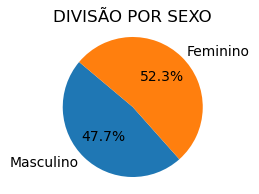

In [18]:
plot_pizza_divisao_por_sexo(df)

In [19]:
df.columns

Index(['Nome', 'CPF', 'Idade', 'Sexo', 'Email', 'Nota_ENEM', 'CRA_2º_Semestre',
       'CRA_4º_Semestre', 'CRA_6º_Semestre', 'Abandono', 'Semestre_Abandono'],
      dtype='object')

In [20]:
media_enem_18_ate_28_anos = df.loc[(df['Idade'] >= 18) & (df['Idade'] <= 28), 'Nota_ENEM'].mean()

In [21]:
print('Pontuação média no ENEM:', media_enem_18_ate_28_anos)

Pontuação média no ENEM: 721.494


In [22]:
nota_enem_min = 640
nota_enem_max = 801

nota_normalizada_min = 5
nota_normalizada_max = 10

In [23]:
nota_ponderada = (nota_normalizada_max - nota_normalizada_min) / (nota_enem_max - nota_enem_min)

In [24]:
df['Nota_ENEM_Ponderada'] = nota_normalizada_min + nota_ponderada * (df['Nota_ENEM'] - nota_enem_min)

In [25]:
df.head()

,Nome,CPF,Idade,Sexo,Email,Nota_ENEM,CRA_2º_Semestre,CRA_4º_Semestre,CRA_6º_Semestre,Abandono,Semestre_Abandono,Nota_ENEM_Ponderada
0,Melissa Silveira,359.847.162-91,22,M,bdas-neves@example.com,771,NaN,5.491834,5.495809,True,1,9.068323
1,Sofia Mendes,360.852.471-17,20,M,stephanyfogaca@example.org,777,6.466784,5.570117,8.355556,False,7,9.254658
2,Srta. Agatha Rezende,247.590.318-04,22,F,joao-lucas90@example.com,770,9.559240,7.459101,7.298546,False,9,9.037267
3,Thales Nogueira,941.536.207-34,20,F,helenasilva@example.com,658,NaN,8.187005,7.770323,True,2,5.559006
4,Sr. Emanuel Aragão,025.349.178-97,25,F,maria-eduardada-costa@example.net,787,9.227646,5.956309,8.626647,True,8,9.565217


In [26]:
def plot_top_10_notas(df):
    top_10_masculino = df[df['Sexo'] == 'M']['Nota_ENEM_Ponderada'].nlargest(10).sort_values().reset_index(drop=True)
    top_10_feminino = df[df['Sexo'] == 'F']['Nota_ENEM_Ponderada'].nlargest(10).sort_values().reset_index(drop=True)
    top_10_notas_enem = df['Nota_ENEM_Ponderada'].nlargest(10).sort_values().reset_index(drop=True)
    top_10_notas = df['CRA_2º_Semestre'].nlargest(10).sort_values().reset_index(drop=True)
    top_10_notas_4 = df['CRA_4º_Semestre'].nlargest(10).sort_values().reset_index(drop=True)
    top_10_notas_6 = df['CRA_6º_Semestre'].nlargest(10).sort_values().reset_index(drop=True)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(range(1, len(top_10_notas) + 1), top_10_notas, marker='d', linestyle='-', label='2º Semestre', color='blue')
    plt.title('Evolução das 10 Maiores Notas do 2º Semestre')
    
    plt.plot(range(1, len(top_10_notas_4) + 1), top_10_notas_4, marker='x', linestyle='-', label='4º Semestre', color='orange')
    plt.title('Evolução das 10 Maiores Notas do 4º Semestre')
    
    plt.plot(range(1, len(top_10_notas_6) + 1), top_10_notas_6, marker='^', linestyle='-', label='6º Semestre', color='green')
    plt.title('Evolução das 10 Maiores Notas do 6º Semestre')
    
    plt.plot(range(1, len(top_10_masculino) + 1), top_10_masculino, marker='o', linestyle='-', label='Masculino Geral', color='red')
    plt.plot(range(1, len(top_10_feminino) + 1), top_10_feminino, marker='s', linestyle='-', label='Feminino Geral', color='purple')
    plt.title('Evolução das 10 Maiores Notas do ENEM Ponderadas por Sexo')
    
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('Nota ENEM Ponderada')
    plt.legend()
    plt.grid(True)
    plt.show()

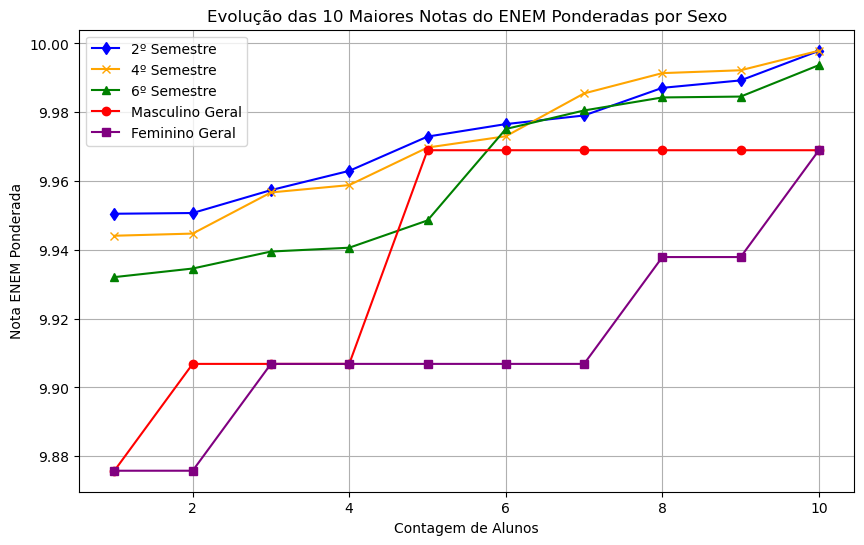

In [27]:
plot_top_10_notas(df)

In [28]:
df.describe()

,Idade,Nota_ENEM,CRA_2º_Semestre,CRA_4º_Semestre,CRA_6º_Semestre,Semestre_Abandono,Nota_ENEM_Ponderada
count,1000.000000,1000.000000,900.000000,891.000000,896.000000,1000.000000,1000.000000
mean,22.982000,721.494000,7.539889,7.534072,7.455722,5.399000,7.530870
std,3.137438,45.522767,1.430995,1.429560,1.445621,2.779843,1.413751
min,18.000000,640.000000,5.016649,5.015396,5.004857,1.000000,5.000000
25%,20.000000,684.000000,6.370006,6.277135,6.159826,3.000000,6.366460
50%,23.000000,722.000000,7.567663,7.565867,7.530722,5.000000,7.546584
75%,26.000000,761.250000,8.752987,8.774293,8.666345,8.000000,8.765528
max,28.000000,800.000000,9.997843,9.997872,9.993683,10.000000,9.968944
